In [4]:
## 기본 라이브러리 호출
import numpy as np
import pandas as pd

## Matplot 호출 및 plotting style 정의 
import matplotlib.pyplot as plt
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['image.cmap'] = 'jet'

In [2]:
## 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Time series decomposition

시계열 데이터가 trend, seasonality, residual components로 구성되었다고 모델링

$$
y_t = f(d_t, s_t, \varepsilon_t)
$$

where $d_t$ is the trend component, $s_t$ is the seasonal component and $\varepsilon_t$ is purely random noise.

## 3.1 Time series components

<ol>
<li><strong>Trend</strong> – 시계열의 전체적인 방향성 i.e. upwards, downwards etc</li>
<li><strong>Seasonality</strong> – 월별, 년별, 계절별 패턴 </li>
<li><strong>Cycle</strong> – 5에서 7년의 긴 사이클 이 경우에는 고려하지 않우에는 고려하지 않음</li>
<li><strong>Noise</strong> – 위의 추세를 제거하고 남은 나머지 </li>
</ol>

In [5]:
## load passenger data set and safe to DataFrame
datapath = '/content/drive/MyDrive/Time Series/international-airline-passengers.csv'
df = pd.read_csv(datapath, header=None, index_col=0)
df = df.rename(columns={1: 'passengers'}) # column 명과
df = df.rename_axis('month') # 인덱스 명 바꿈
df.index = pd.to_datetime(df.index, format='%Y-%m') # 인덱스를 datetime format으로
y = df['passengers'] # New pandas Series

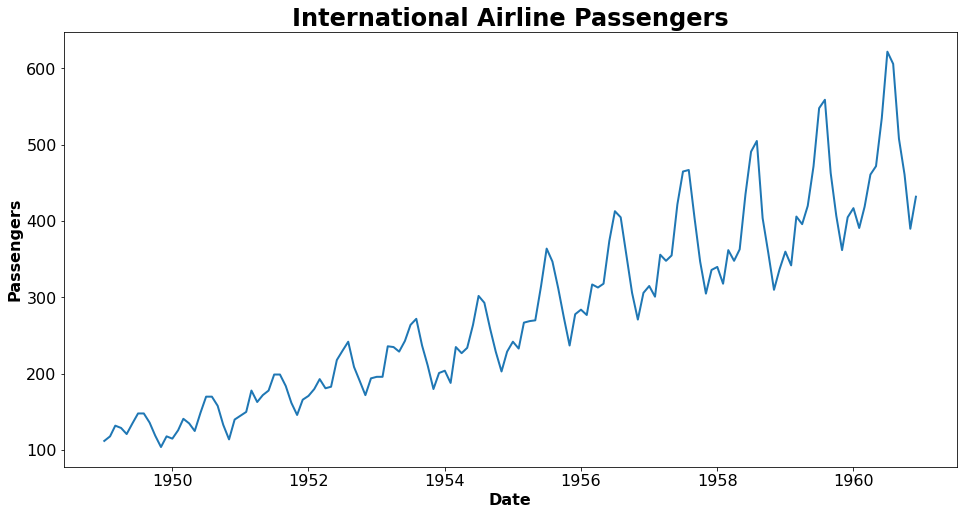

In [6]:
# simple line plot
plt.plot(df)
plt.title('International Airline Passengers', fontsize=24)
plt.ylabel('Passengers')
plt.xlabel('Date')
plt.show()

## 3.2 Trend

위 plot에서 선형적으로 증가하는 추세가 있다고 판단할 수 있음.

Plot을 그리거나 통계적인 방법으로 확인할 수 있으며, 간단히 moving average를 통한 smoothing으로도 확인 가능

### Moving averages over time

Moving average는 특정 윈도우 크기를 잡아 윈도우 안의 값들을 평균을 내서 smoothing 하는 방법

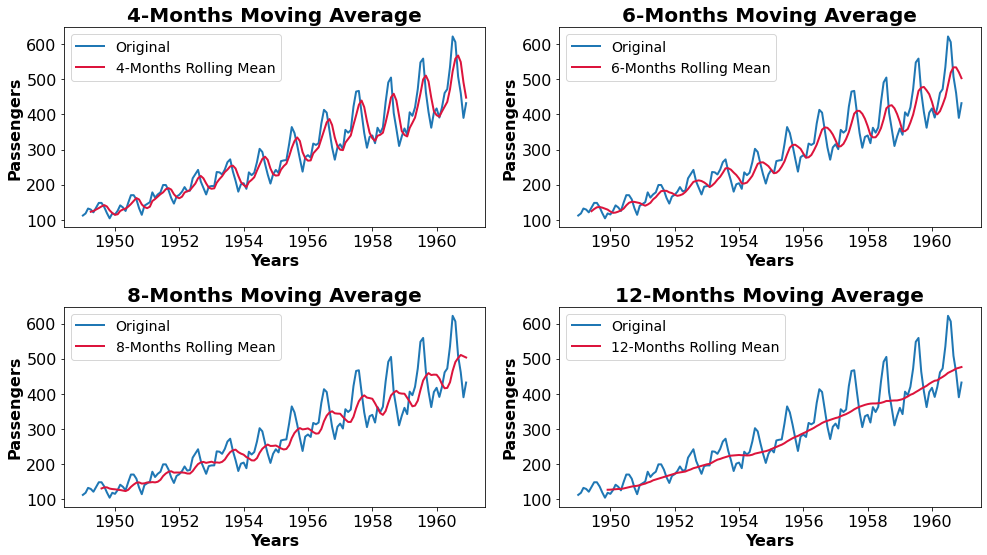

In [7]:
## Initialize figure and axes
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False);
fig.set_figwidth(14);
fig.set_figheight(8);

## Upper left
axes[0][0].plot(y.index, y, label='Original')
axes[0][0].plot(y.index, y.rolling(window=4).mean(), label='4-Months Rolling Mean', color='crimson')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Passengers")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

## Upper right
axes[0][1].plot(y.index, y, label='Original')
axes[0][1].plot(y.index, y.rolling(window=6).mean(), label='6-Months Rolling Mean', color='crimson')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Passengers")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

## Lower left
axes[1][0].plot(y.index, y, label='Original')
axes[1][0].plot(y.index, y.rolling(window=8).mean(), label='8-Months Rolling Mean', color='crimson')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Passengers")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

## Lower right
axes[1][1].plot(y.index, y, label='Original');
axes[1][1].plot(y.index, y.rolling(window=12).mean(), label='12-Months Rolling Mean', color='crimson')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Passengers")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

rolling_mean window 크기가 늘어날 수록 함수가 더 smooth 해진 것을 확인. 확실하게 증가하는 추세가 있는 것으로 파악됨.

## 3.3 Seasonality

사람들은 보통 여름에 여행을 많이 가므로 매년 마다 매달 승객 수를 분석하여 계절성을 확인

In [8]:
## 기존 df 를 복사하여 새로운 dataframe 생성
df_copied = df.copy()
df_copied['Month'] = df_copied.index.strftime('%b')
df_copied['Year'] = df_copied.index.year

In [9]:
df_copied

,passengers,Month,Year
month,,,
1949-01-01,112,Jan,1949
1949-02-01,118,Feb,1949
1949-03-01,132,Mar,1949
1949-04-01,129,Apr,1949
1949-05-01,121,May,1949
...,...,...,...
1960-08-01,606,Aug,1960
1960-09-01,508,Sep,1960
1960-10-01,461,Oct,1960


In [10]:
## Pivot을 이용하여 'Year'를 column, 'Month'를 index로 
df_piv_line = df_copied.pivot(index='Month', columns='Year', values='passengers')

## 1월 (Jan) 부터 12월 순으로 정렬
month_names = pd.date_range(start='1949-01-01', periods=12, freq='MS').strftime('%b')
df_piv_line = df_piv_line.reindex(index=month_names)

In [ ]:
df_piv_line

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


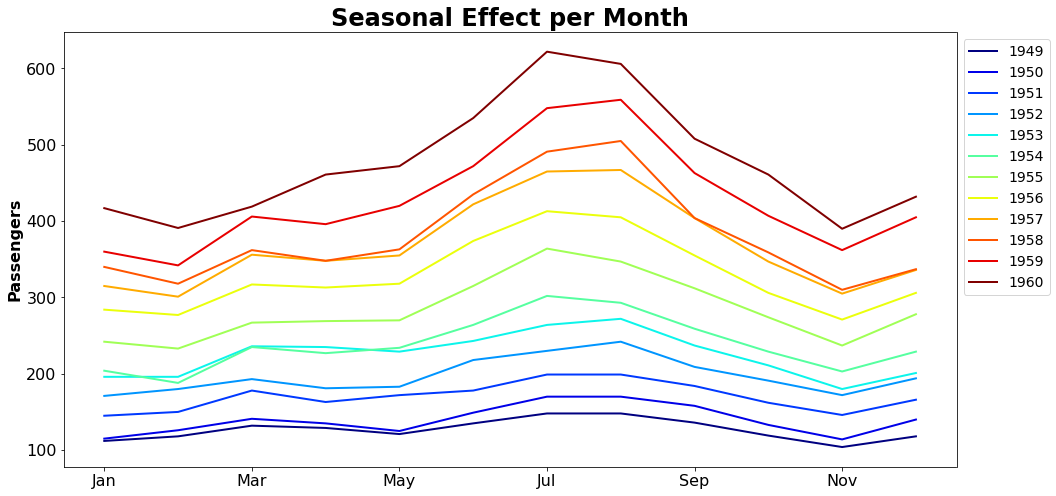

In [ ]:
## Plot 해서 확인
df_piv_line.plot(colormap='jet');
plt.title('Seasonal Effect per Month', fontsize=24)
plt.ylabel('Passengers')
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
plt.show()

<ul>
<li>Trend에서 확인했던 것처럼 해가 갈수록 승객수가 증가하는 것을 확인할 수 있음.</li>
<li>7,8월이 피크이며 이때가 평균과 분산이 매우 큼</li>
<li>결론적으로 12의 seasonality가 존재함</li>
</ul>


## 3.4 Noise

Time series decomposition은 'multiplicative'와 'additive' 형으로 나눌 수 있음.

$$
y_t = d_t \cdot s_t \cdot \varepsilon_t
$$

이 방법은 주로 데이터에 담겨진 패턴을 보기 위한 방법이고 분석에는 SARIMA 등의 기법이 사용됨.


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


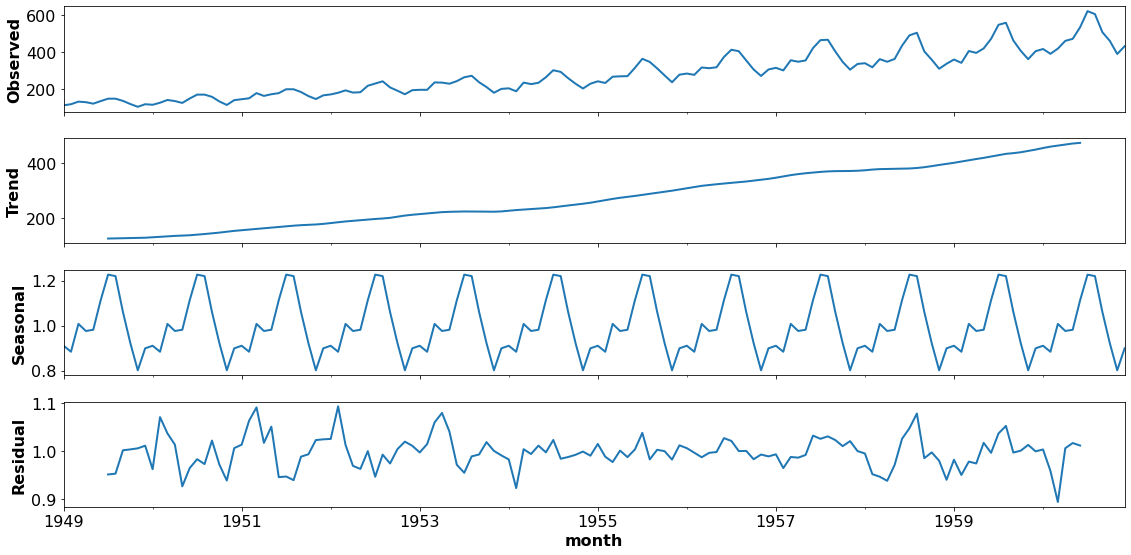

In [12]:
## Multiplicative seasonal decomposition
decomp = seasonal_decompose(y, model='multiplicative')
decomp.plot()
plt.show()

<strong>Inference</strong>
<ul>
<li><strong>Trend</strong> - 선형적인 추세로 증가</li>
<li><strong>Seasonality</strong> - 명확하게 월별 패턴을 가짐을 알 수 있음. </li>
<li><strong>Noise</strong> - 추세와 계절성이 제거된 후의 나머지</li>
</ul>

'additive' 모델은 다음과 같이 정의됨.

$$
y_t = d_t + s_t + \varepsilon_t
$$

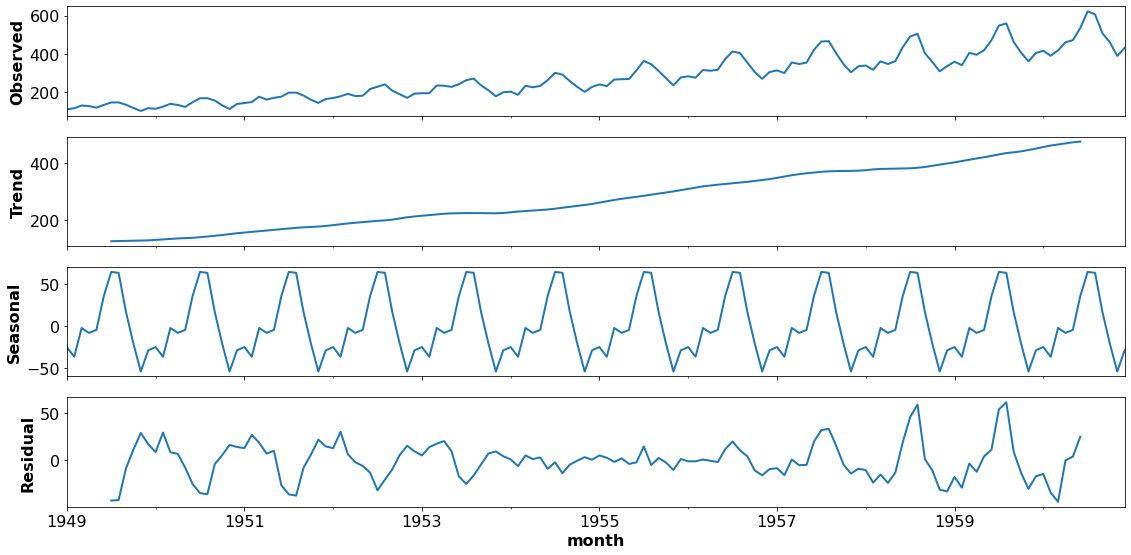

In [ ]:
## Additive seasonal decomposition
decomp = seasonal_decompose(y, model='additive')
decomp.plot()
plt.show()

<li>각 성분을 곱하기 혹은 더하기 한 것이므로 scale의 차이가 남</li>
<li>나머지에도 어렴풋이 패턴이 존재하는 듯함.</li>
<li>나머지의 scale로 보았을 때 multiplicative 모델이 더 적합.(데이터의 음수가 들어있는 경우에는 일반적으로 additive 모델을 사용)</li>
</ul>

